In [2]:
import gensim
import gensim.downloader as gdl
glove = gdl.load("glove-wiki-gigaword-100")

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

%matplotlib inline

In [4]:
def generate_tsne_for_voc(model, voc):
    arr = np.empty((0,100), dtype='f')
    for w in voc:
        wrd_vector = model[w]
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coord = Y[:, 0]
    y_coord = Y[:, 1]
    # display scatter plot
    plt.figure(figsize=(15,15))    
    plt.scatter(x_coord, y_coord, s=2)
    plt.show()
    return (Y,voc)


def display_tsne_words(Z, input_words, size1=2, size2=50, offset=5):
    Y = Z[0]
    voc = Z[1]
    x_coord = Y[:, 0]
    y_coord = Y[:, 1]
    # display scatter plot
    plt.figure(figsize=(15,15))
    plt.scatter(x_coord, y_coord, s=size1)
    for w in np.arange(len(input_words)):
        index = voc.index(input_words[w])
        plt.scatter(x_coord[index], y_coord[index],s=size2)
        plt.annotate(input_words[w], xy=(x_coord[index],y_coord[index]), \
                     xytext=(w*offset,w*offset), textcoords='offset points')
    plt.show()
    


In [5]:
from collections import Counter
import time
import nltk

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
logging.root.level = logging.CRITICAL 

s = time.time()
voc = Counter()
for rec in open ('../lab08/text8', 'r'):
    rec = rec.strip()
    voc.update(rec.split())
print(time.time()-s)

6.056319713592529


In [6]:
words = voc.most_common(5100)[100:]
vocab = [word[0] for word in words]
len(vocab)

5000

<Figure size 1080x1080 with 0 Axes>

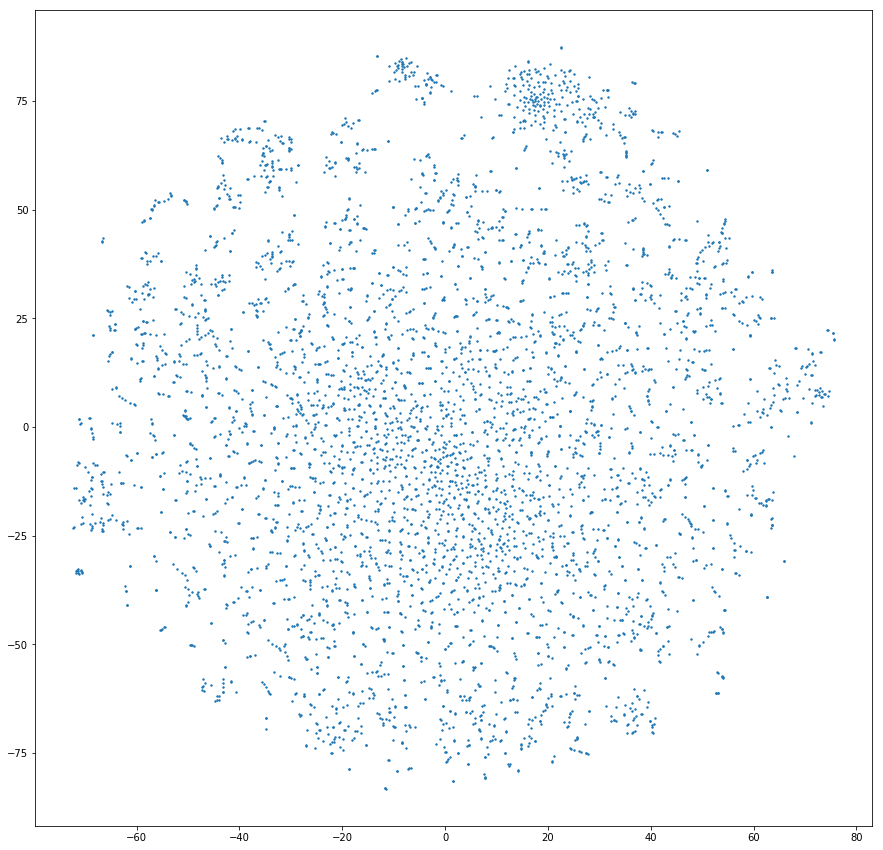

CPU times: user 1min 3s, sys: 302 ms, total: 1min 4s
Wall time: 1min 3s


In [7]:
%%time
filtered_voc = [w for w in vocab if w in glove.vocab]
len(filtered_voc)
plt.figure(figsize=(15,15))
Z = generate_tsne_for_voc(glove, filtered_voc)

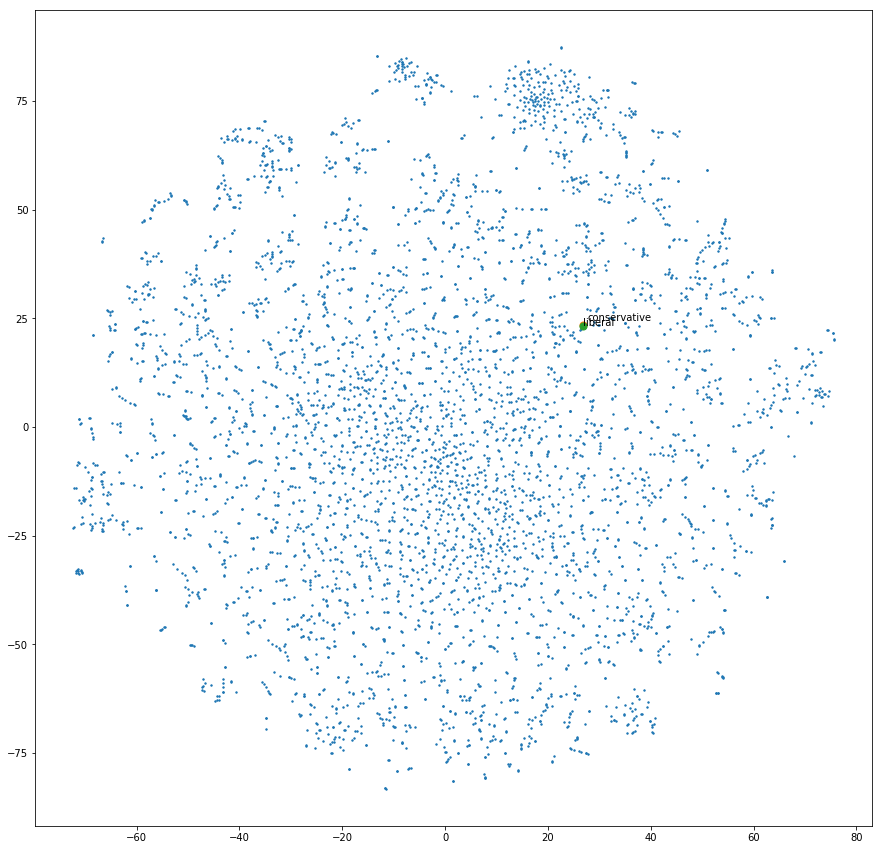

In [8]:
display_tsne_words(Z, input_words=['liberal', 'conservative'])